# <b>Linear regression 


It is a statistical method used in machine learning to model the relationship between a dependent variable and one or more independent variables. It tries to fit a straight line (called the regression line) that best captures the relationship between the variables. The goal of linear regression is to minimize the residual sum of squares between the observed response values and the values predicted by the line of best fit. </b>

<b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>
# <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import from csv
ds2 = pd.read_csv('D:\car data\Copy of Car details v3.csv')
ds3 = pd.read_csv('D:\car data\Copy of CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
print(ds2.columns)
print(ds3.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [6]:
# to match the columns from ds3
ds2.drop(['mileage','engine','max_power','torque','seats'],axis = 1,inplace = True)

In [7]:
# # merge the datasets
# temp1 = [ds2,ds3]
# df1 = pd.concat(temp1)
# df1.describe().transpose()

In [8]:
df1 = ds3

In [9]:
df1[df1['transmission'] == 'Automatic']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
25,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner
31,Maruti Vitara Brezza ZDi Plus AMT,2018,975000,4500,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
4300,Mercedes-Benz E-Class E250 CDI Elegance,2011,999000,49600,Diesel,Dealer,Automatic,First Owner
4302,BMW 7 Series 730Ld,2006,1050000,30000,Diesel,Dealer,Automatic,First Owner
4304,Audi Q5 3.0 TDI Quattro Technology,2018,3899000,22000,Diesel,Dealer,Automatic,First Owner
4311,Toyota Camry Hybrid 2.5,2017,1900000,20118,Petrol,Dealer,Automatic,First Owner


In [10]:
# Retain the company name and only the model name

lst1 = df1['name'].tolist()
lstnew = []

for x in lst1:
   pre = x.split(" ",2)[0:2]
   pre[0:2] = [' '.join(pre[0:2])]
   
   lstnew.append(pre)   

result = sum(lstnew, [])
print(result)

['Maruti 800', 'Maruti Wagon', 'Hyundai Verna', 'Datsun RediGO', 'Honda Amaze', 'Maruti Alto', 'Hyundai Xcent', 'Tata Indigo', 'Hyundai Creta', 'Maruti Celerio', 'Chevrolet Sail', 'Tata Indigo', 'Toyota Corolla', 'Maruti 800', 'Maruti Wagon', 'Hyundai Verna', 'Datsun RediGO', 'Honda Amaze', 'Maruti Alto', 'Hyundai Xcent', 'Tata Indigo', 'Hyundai Creta', 'Maruti Celerio', 'Chevrolet Sail', 'Tata Indigo', 'Toyota Corolla', 'Maruti Ciaz', 'Hyundai Venue', 'Chevrolet Enjoy', 'Jaguar XF', 'Mercedes-Benz New', 'Maruti Vitara', 'Audi Q5', 'Honda City', 'Tata Tigor', 'Audi A6', 'Mercedes-Benz New', 'Skoda Superb', 'Toyota Corolla', 'Toyota Innova', 'Jeep Compass', 'Mercedes-Benz E-Class', 'Hyundai i10', 'BMW 3', 'Audi Q7', 'Hyundai Elantra', 'Mahindra Scorpio', 'Honda City', 'Maruti Wagon', 'Maruti Wagon', 'Mahindra Scorpio', 'Hyundai Santro', 'Hyundai Grand', 'Maruti Alto', 'Maruti Swift', 'Maruti Eeco', 'Hyundai i20', 'Maruti Omni', 'Maruti Swift', 'Hyundai i20', 'Maruti Alto', 'Mahindra Jee

In [11]:
dfnew = pd.DataFrame(result)
dfnew.head()
dfnew.columns= ['lstnew']
df1['name']= dfnew['lstnew']

In [12]:
# rename the columns
df1.columns= ('car_name','year','selling_price','kms_driven','fuel_type','seller_type','transmission','owner')

In [13]:
df1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df1[df1['fuel_type'].str.contains('Electric',case = False)]

,car_name,year,selling_price,kms_driven,fuel_type,seller_type,transmission,owner
4145,Toyota Camry,2006,310000,62000,Electric,Dealer,Automatic,Second Owner


In [15]:
# removing unique values
df1[df1['fuel_type'].str.contains('Electric', case=False)]
df1.drop(index=4145, axis=0, inplace=True)

In [16]:
df1['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [17]:
df1.columns

Index(['car_name', 'year', 'selling_price', 'kms_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [18]:
cont_var = ['year','kms_driven']
disc_var = ['fuel_type','seller_type','transmission','owner']

In [19]:
df1['transmission'] = np.where(df1['transmission']=='Manual',1,0)

In [20]:
# using one hot encoding for catergorical values
df1 = pd.get_dummies(df1,columns=['fuel_type','owner','seller_type'])

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4339
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   car_name                      4339 non-null   object
 1   year                          4339 non-null   int64 
 2   selling_price                 4339 non-null   int64 
 3   kms_driven                    4339 non-null   int64 
 4   transmission                  4339 non-null   int32 
 5   fuel_type_CNG                 4339 non-null   uint8 
 6   fuel_type_Diesel              4339 non-null   uint8 
 7   fuel_type_LPG                 4339 non-null   uint8 
 8   fuel_type_Petrol              4339 non-null   uint8 
 9   owner_First Owner             4339 non-null   uint8 
 10  owner_Fourth & Above Owner    4339 non-null   uint8 
 11  owner_Second Owner            4339 non-null   uint8 
 12  owner_Test Drive Car          4339 non-null   uint8 
 13  owner_Third Owner 

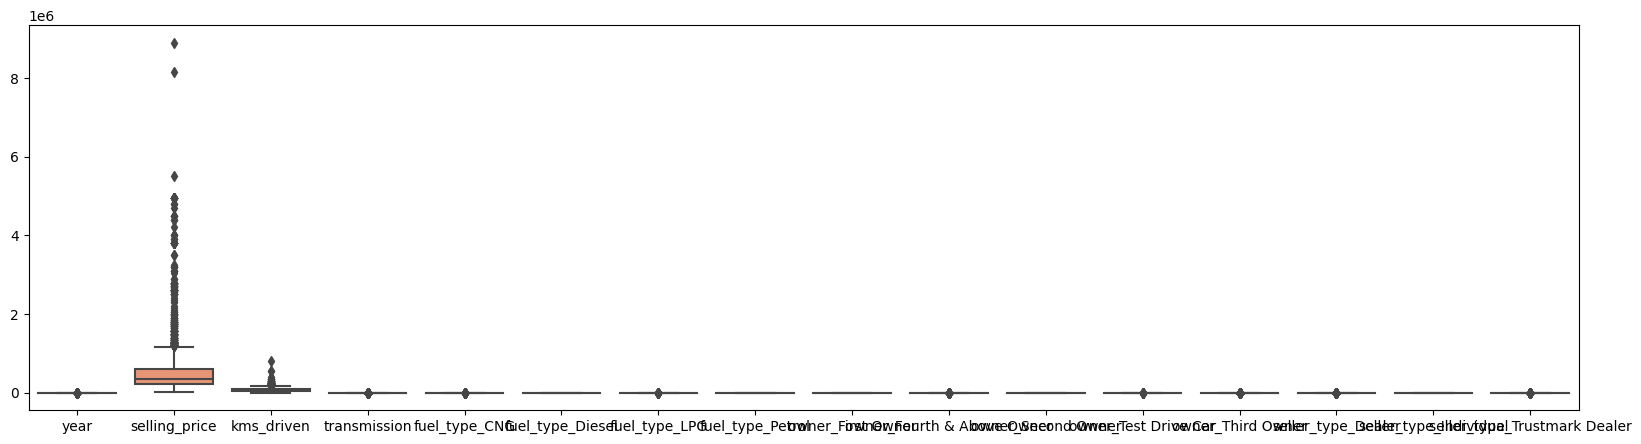

In [22]:
plt.figure(figsize = (20,5))
sns.boxplot(data=df1)
plt.show()

In [23]:
# We can perform outlier detection using the interquartile range (IQR) method.
q1 = df1['kms_driven'].quantile(0.25)
q3 = df1['kms_driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

55000.0 172500.0 -47500.0


In [24]:
df1 = df1[df1['kms_driven']<UL]

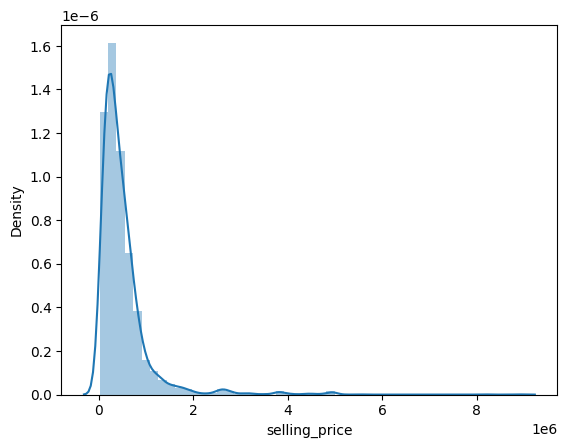

In [25]:
# the selling price is left skewed and we can perform log transformation
sns.distplot(df1['selling_price'])
plt.show()

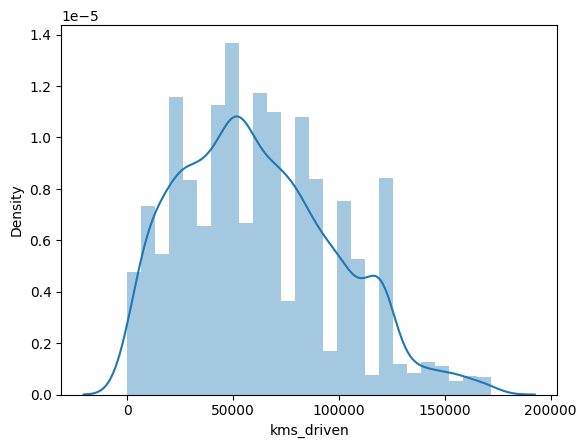

In [26]:
sns.distplot(df1['kms_driven'])
plt.show()

In [27]:
# creating new column as company cat
df1['car_name'].unique()
df1['company'] = df1['car_name'].str.split(" ", expand=True)[0]
df1['company_cat'] = df1['selling_price'].apply(lambda x : 1 if x > 2000000 else (0 if x<=2000000 else 2))
df1

,car_name,year,selling_price,kms_driven,transmission,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,company,company_cat
0,Maruti 800,2007,60000,70000,1,0,0,0,1,1,0,0,0,0,0,1,0,Maruti,0
1,Maruti Wagon,2007,135000,50000,1,0,0,0,1,1,0,0,0,0,0,1,0,Maruti,0
2,Hyundai Verna,2012,600000,100000,1,0,1,0,0,1,0,0,0,0,0,1,0,Hyundai,0
3,Datsun RediGO,2017,250000,46000,1,0,0,0,1,1,0,0,0,0,0,1,0,Datsun,0
4,Honda Amaze,2014,450000,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,Honda,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20,2014,409999,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,Hyundai,0
4336,Hyundai i20,2014,409999,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,Hyundai,0
4337,Maruti 800,2009,110000,83000,1,0,0,0,1,0,0,1,0,0,0,1,0,Maruti,0
4338,Hyundai Creta,2016,865000,90000,1,0,1,0,0,1,0,0,0,0,0,1,0,Hyundai,0


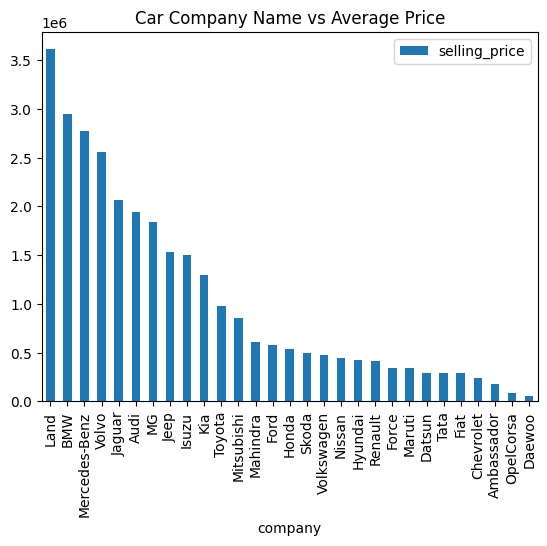

In [28]:
df_autox = pd.DataFrame(df1.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [29]:
# calculating multicolinearity for continous variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
calc_vif(df1[[i for i in df1.describe().columns if i in ['year','kms_driven']]])

,variables,VIF
0,year,3.894849
1,kms_driven,3.894849


In [31]:
observed =  df1[[col for col in df1.columns if col not in ['year','kms_driven','car_name','selling_price','company']]]
observed.head()

,transmission,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,company_cat
0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [32]:
# calculating multicolinearity for categorical variables using chi square method

import scipy.stats as stats
import numpy as np

# Example data
observed =  df1[[col for col in df1.columns if col not in ['year','kms_driven','car_name','selling_price','company']]]

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Interpret the results
if p < 0.05:
    print("Reject the null hypothesis. There is a relationship between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between the variables.")

Fail to reject the null hypothesis. There is no relationship between the variables.


In [33]:
# to remove companies with single digit car models
value_counts = df1['company'].value_counts()
to_remove = value_counts[value_counts < 10].index
df1 =df1[~ df1['company'].isin(to_remove)]

<AxesSubplot: >

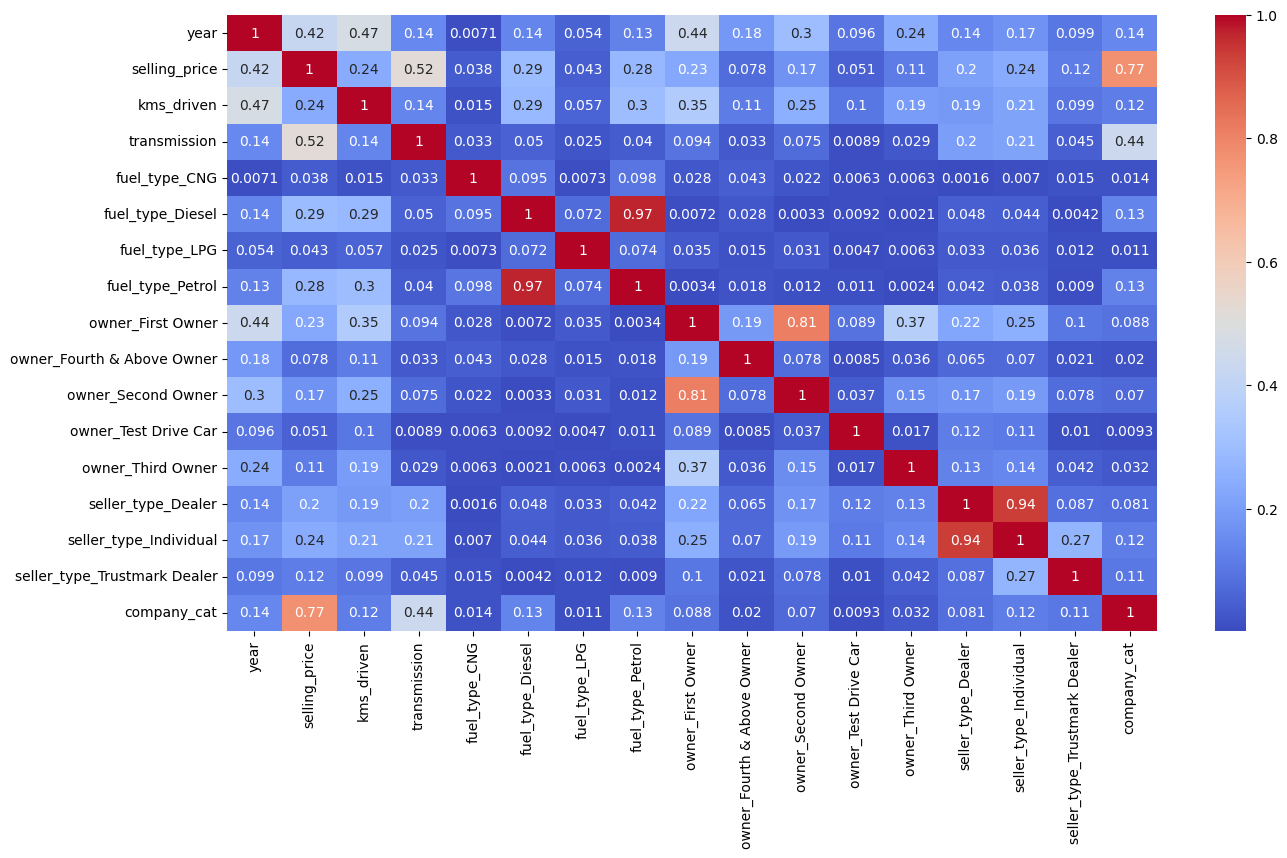

In [34]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#  Analysis

In [35]:
dffinal = df1
dffinal = dffinal.reset_index(drop=True)

In [36]:
dftesting =dffinal.loc[2:3]
dftesting

,car_name,year,selling_price,kms_driven,transmission,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,company,company_cat
2,Hyundai Verna,2012,600000,100000,1,0,1,0,0,1,0,0,0,0,0,1,0,Hyundai,0
3,Datsun RediGO,2017,250000,46000,1,0,0,0,1,1,0,0,0,0,0,1,0,Datsun,0


In [37]:
# dftesting =dffinal.loc[2:3]
# #dfx = dffinal.drop(columns = ['Car_Name','Company','Selling_Price'],inplace=True)
# dftesting.drop(columns = ['Car_Name','Company','Selling_Price'],inplace=True )
# #dftesting = scaler.transform(dftesting)
# x = regressor.predict(dftesting)
# x = np.power(10, x)
# x

In [38]:
df1.head()

,car_name,year,selling_price,kms_driven,transmission,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,company,company_cat
0,Maruti 800,2007,60000,70000,1,0,0,0,1,1,0,0,0,0,0,1,0,Maruti,0
1,Maruti Wagon,2007,135000,50000,1,0,0,0,1,1,0,0,0,0,0,1,0,Maruti,0
2,Hyundai Verna,2012,600000,100000,1,0,1,0,0,1,0,0,0,0,0,1,0,Hyundai,0
3,Datsun RediGO,2017,250000,46000,1,0,0,0,1,1,0,0,0,0,0,1,0,Datsun,0
4,Honda Amaze,2014,450000,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,Honda,0


In [39]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   car_name                      4194 non-null   object
 1   year                          4194 non-null   int64 
 2   selling_price                 4194 non-null   int64 
 3   kms_driven                    4194 non-null   int64 
 4   transmission                  4194 non-null   int32 
 5   fuel_type_CNG                 4194 non-null   uint8 
 6   fuel_type_Diesel              4194 non-null   uint8 
 7   fuel_type_LPG                 4194 non-null   uint8 
 8   fuel_type_Petrol              4194 non-null   uint8 
 9   owner_First Owner             4194 non-null   uint8 
 10  owner_Fourth & Above Owner    4194 non-null   uint8 
 11  owner_Second Owner            4194 non-null   uint8 
 12  owner_Test Drive Car          4194 non-null   uint8 
 13  owner_Third Owner 

In [40]:
# segrigating independent variables
features = []

for x in dffinal.columns:
  features.append(x)

features.remove('selling_price')
features.remove('car_name')
features.remove('company')
print(features)

['year', 'kms_driven', 'transmission', 'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_LPG', 'fuel_type_Petrol', 'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'company_cat']


In [41]:
X = dffinal[features]

In [42]:
#y = np.log10(dffinal['selling_price'])
y = dffinal['selling_price']

In [43]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 10) 
print(X_train.shape)
print(X_test.shape)

(2935, 16)
(1259, 16)


In [44]:
#standardization of the data

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)


In [46]:
#Building model using sklearn

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg = regressor.fit(X_train, y_train)

# Getting the coefficients and intercept

print('coefficients:\n', regressor.coef_)
print('\n intercept:', regressor.intercept_)

regressor.score(X_test,y_test)

#Now predicting on the test data


#X_test = scaler.transform(X_test)
y_pred = regressor.predict(X_test)

coefficients:
 [ 3.14306154e+04 -7.94162416e-01 -3.39677811e+05 -6.62708592e+04
  1.64637402e+05 -5.95291598e+04 -3.88373825e+04 -2.31764605e+04
 -4.23470404e+04 -5.42608501e+04  1.84346354e+05 -6.45620029e+04
  4.57698145e+04 -3.49659540e+04 -1.08038605e+04  2.52112111e+06]

 intercept: -62483458.25442873


In [47]:
# Calculating the accuracy

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.7523881816666917
0.7706112443107678


In [ ]:
sns.

In [48]:
# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df['Actual'] = np.power(10, df['Actual'])
df['Predicted'] = np.power(10, df['Predicted'])

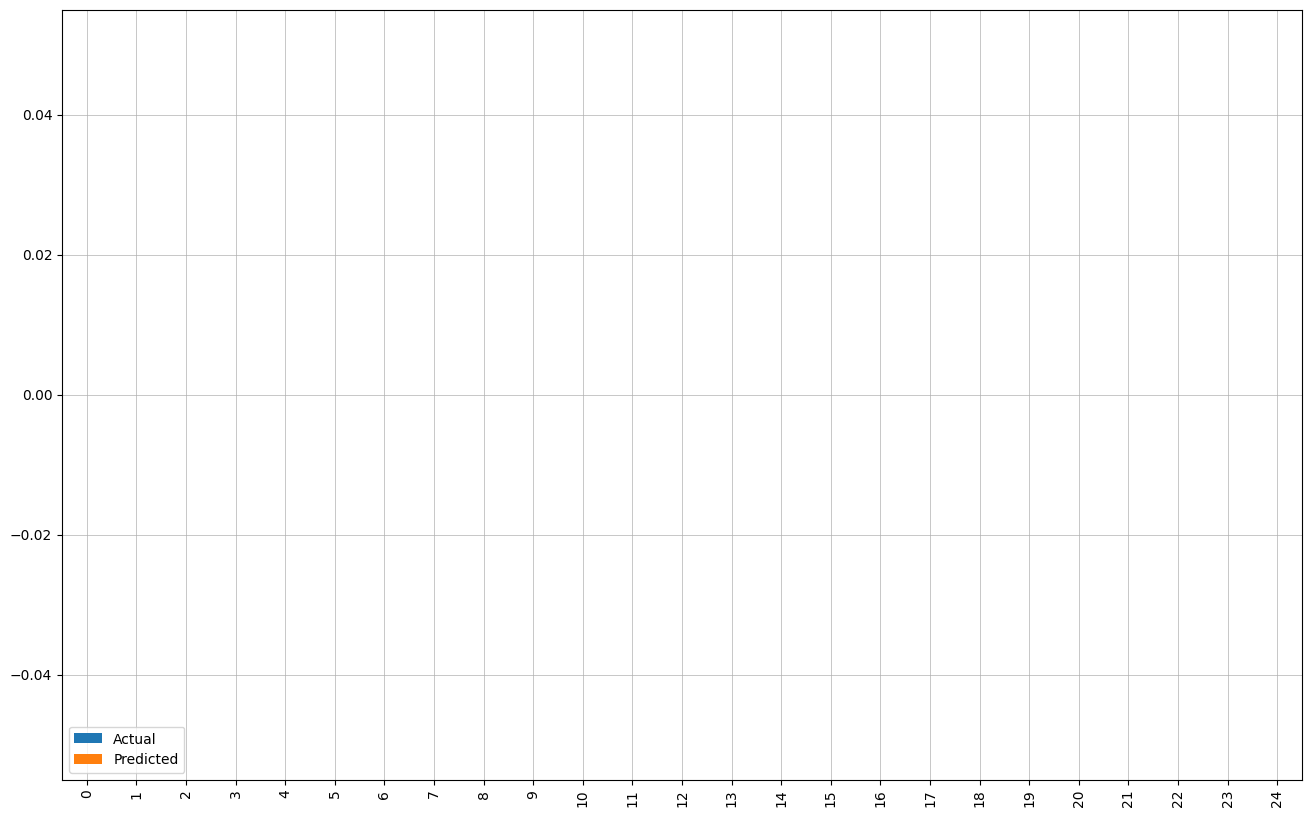

In [50]:
#Showing the difference between the actual and predicted value

dfg = df.head(25)
dfg.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [51]:
dffinal.drop(['car_name','company','selling_price'],axis = 1, inplace = True)

In [52]:
dfx = dffinal

In [53]:
dfx.head()

,year,kms_driven,transmission,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,company_cat
0,2007,70000,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,2007,50000,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,2012,100000,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,2017,46000,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,2014,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [54]:
dfx.transmission == 0

0       False
1       False
2       False
3       False
4       False
        ...  
4189    False
4190    False
4191    False
4192    False
4193    False
Name: transmission, Length: 4194, dtype: bool

In [55]:
dfx.columns

Index(['year', 'kms_driven', 'transmission', 'fuel_type_CNG',
       'fuel_type_Diesel', 'fuel_type_LPG', 'fuel_type_Petrol',
       'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'company_cat'],
      dtype='object')

In [56]:
np.where(dfx.columns==fuel_type)[0][0]

NameError: name 'fuel_type' is not defined

In [77]:
def predict_price(year,kms_driven,transmission,fuel_type,owner,seller_type):    
    
    loc_index001 = np.where(dfx.columns==transmission)[0]
    loc_index002 = np.where(dfx.columns==fuel_type)[0]
    loc_index003 = np.where(dfx.columns==owner)[0]
    loc_index004 = np.where(dfx.columns==seller_type)[0]
    

    x = np.zeros(len(dfx.columns))
    x[0] = year
    x[1] = kms_driven
    
    for i in (loc_index001,loc_index002,loc_index003,loc_index004):
        if i >= 0:
            x[i] = 1
    
    
    sumx = x.reshape(1, -1)
    #sumx = scaler.transform(sumx)
#     sumx = scaler.transform(sumx)
    return regressor.predict(sumx)[0], x, sumx

In [82]:
predm = predict_price(2007,50000,1,'fuel_type_Diesel','owner_First Owner','seller_type_Individual')

In [83]:
predm

(664573.7792899013,
 array([2.007e+03, 5.000e+04, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([[2.007e+03, 5.000e+04, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]]))

In [87]:
X_train.to_excel("output.xlsx") 

In [88]:
y_train.to_excel('y_out.xlsx')

In [86]:
pip install openpyxl


     -------------------------------------- 249.8/249.8 kB 7.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
normal_value = math.pow(10, predm)
normal_value

OverflowError: math range error

In [74]:
df1

,car_name,year,selling_price,kms_driven,transmission,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,company,company_cat
0,Maruti 800,2007,60000,70000,1,0,0,0,1,1,0,0,0,0,0,1,0,Maruti,0
1,Maruti Wagon,2007,135000,50000,1,0,0,0,1,1,0,0,0,0,0,1,0,Maruti,0
2,Hyundai Verna,2012,600000,100000,1,0,1,0,0,1,0,0,0,0,0,1,0,Hyundai,0
3,Datsun RediGO,2017,250000,46000,1,0,0,0,1,1,0,0,0,0,0,1,0,Datsun,0
4,Honda Amaze,2014,450000,141000,1,0,1,0,0,0,0,1,0,0,0,1,0,Honda,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20,2014,409999,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,Hyundai,0
4336,Hyundai i20,2014,409999,80000,1,0,1,0,0,0,0,1,0,0,0,1,0,Hyundai,0
4337,Maruti 800,2009,110000,83000,1,0,0,0,1,0,0,1,0,0,0,1,0,Maruti,0
4338,Hyundai Creta,2016,865000,90000,1,0,1,0,0,1,0,0,0,0,0,1,0,Hyundai,0


In [ ]:
np.where(dffinal.columns=='company_cat_Luxury')[0][0]

In [ ]:
import statsmodels.api as sm

# fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# perform the Breusch-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print(dict(zip(name, test)))


In [ ]:
# elastic net regression

In [ ]:
X.columns

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
# how much importance should be given to l1 reguralization
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                         precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')


In [ ]:
cv_model.fit(X_train, y_train)

In [ ]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
#The amount of penalization chosen by cross validation

print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
#The compromise between l1 and l2 penalization chosen by cross validation

print('Number of iterations %d'%cv_model.n_iter_)
#number of iterations run by the coordinate descent solver to reach the specified tolerance for the optimal alpha.

In [ ]:
# train model with best parameters from CV
elastic = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True)
elastic.fit(X_train, y_train)